In [2]:
from pyspark.sql import SparkSession
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
filepath = "/Users/trinh.thien/Documents/Projects/Bank Loan Status/Data/credit_train.csv"

dfUsingPandas = pd.read_csv(filepath)

spark = SparkSession.builder.getOrCreate()
df = spark.read.csv(filepath, sep=',', header=True)

df.show(5)

+--------------------+--------------------+-----------+-------------------+----------+------------+-------------+--------------------+--------------+------------------+------------+-----------------------+----------------------------+-----------------------+-------------------------+----------------------+-------------------+------------+---------+
|             Loan ID|         Customer ID|Loan Status|Current Loan Amount|      Term|Credit Score|Annual Income|Years in current job|Home Ownership|           Purpose|Monthly Debt|Years of Credit History|Months since last delinquent|Number of Open Accounts|Number of Credit Problems|Current Credit Balance|Maximum Open Credit|Bankruptcies|Tax Liens|
+--------------------+--------------------+-----------+-------------------+----------+------------+-------------+--------------------+--------------+------------------+------------+-----------------------+----------------------------+-----------------------+-------------------------+--------------

In [3]:
df.printSchema()

root
 |-- Loan ID: string (nullable = true)
 |-- Customer ID: string (nullable = true)
 |-- Loan Status: string (nullable = true)
 |-- Current Loan Amount: string (nullable = true)
 |-- Term: string (nullable = true)
 |-- Credit Score: string (nullable = true)
 |-- Annual Income: string (nullable = true)
 |-- Years in current job: string (nullable = true)
 |-- Home Ownership: string (nullable = true)
 |-- Purpose: string (nullable = true)
 |-- Monthly Debt: string (nullable = true)
 |-- Years of Credit History: string (nullable = true)
 |-- Months since last delinquent: string (nullable = true)
 |-- Number of Open Accounts: string (nullable = true)
 |-- Number of Credit Problems: string (nullable = true)
 |-- Current Credit Balance: string (nullable = true)
 |-- Maximum Open Credit: string (nullable = true)
 |-- Bankruptcies: string (nullable = true)
 |-- Tax Liens: string (nullable = true)



In [4]:
# drop rows having null values
df = df.na.drop(subset=["Customer ID"])

In [5]:
# create temporary view for a Data Frame
df.createOrReplaceTempView("LoanTable")

C:\Users\trinh.thien\AppData\Local\Temp\ipykernel_10096\285969764.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dfUsingPandas.corr(),annot=True,cmap="crest")


<AxesSubplot: >

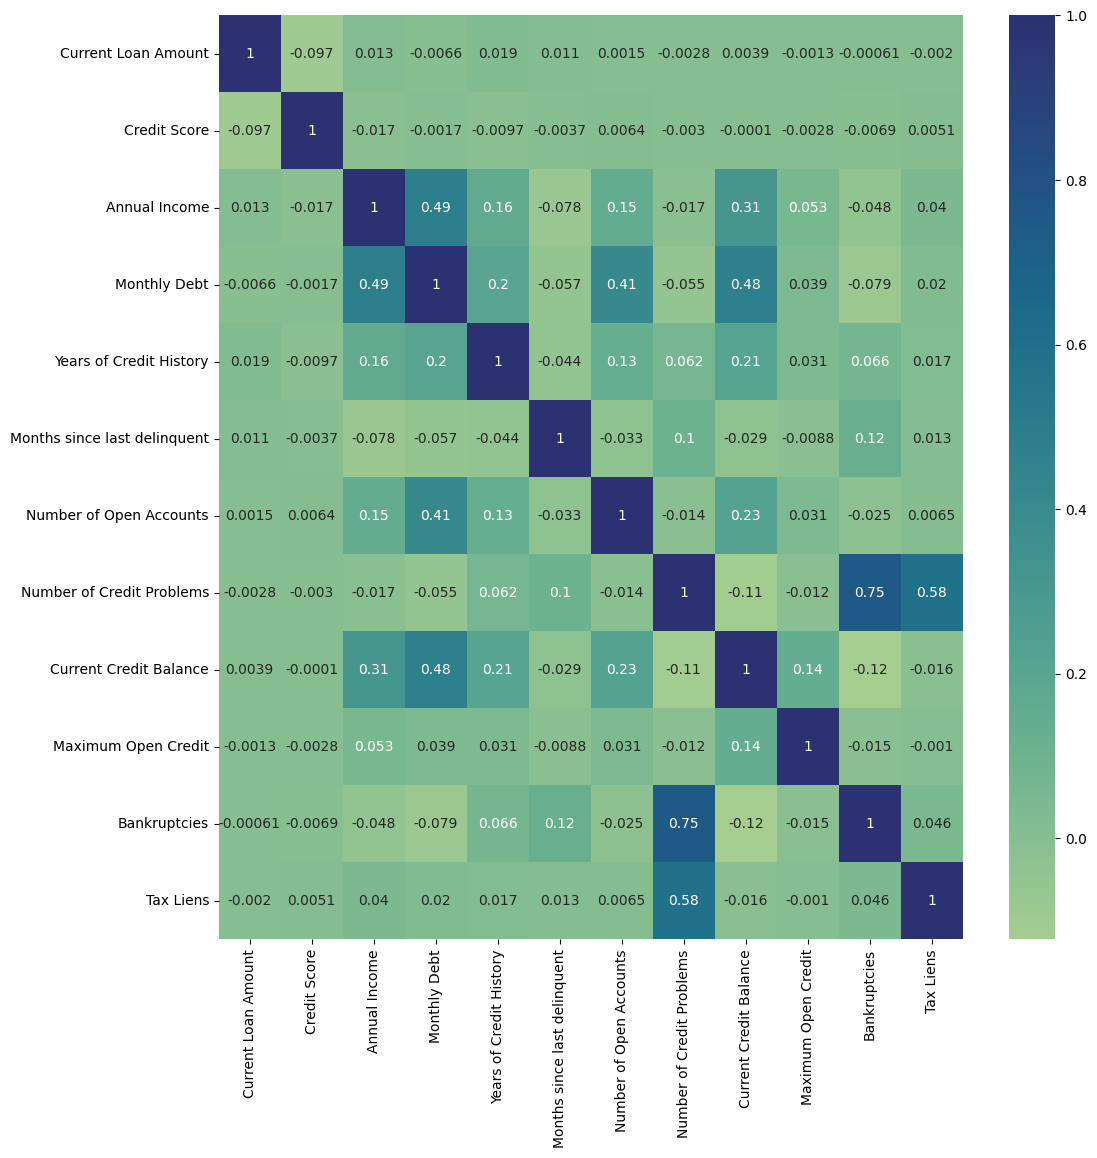

In [10]:
plt.figure(figsize=(12,12))
sns.heatmap(dfUsingPandas.corr(),annot=True,cmap="crest")

# Discover relationship between columns of our dataset: 
# - Annual income & Monthly Debt : 0.49
# - Current credit balance & Monthly debt : 0.48
# - Number of open accounts & Monthly debt : 0.41
# - Number of Credit Problems & Bankruptcies: 0.75
# - Number of Credit Problems & Taxliens : 0.58

In [86]:
df1= spark.sql("SELECT MAX(`Credit Score`) as Max, min(`Credit Score`) as Min, avg(`Credit Score`) as Medium from LoanTable").show()

+----+---+------------------+
| Max|Min|            Medium|
+----+---+------------------+
|7510|585|1076.4560893550702|
+----+---+------------------+



In [87]:
df2 = spark.sql("select `Number of Credit Problems`, `Bankruptcies` from LoanTable ").show(10)

+-------------------------+------------+
|Number of Credit Problems|Bankruptcies|
+-------------------------+------------+
|                        1|           1|
|                        0|           0|
|                        1|           0|
|                        0|           0|
|                        0|           0|
|                        0|           0|
|                        1|           1|
|                        0|           0|
|                        0|           0|
|                        0|           0|
+-------------------------+------------+
only showing top 10 rows



In [88]:
df3 = spark.sql("select `Tax Liens`, `Number of Credit Problems` from LoanTable ").show(10)

+---------+-------------------------+
|Tax Liens|Number of Credit Problems|
+---------+-------------------------+
|        0|                        1|
|        0|                        0|
|        0|                        1|
|        0|                        0|
|        0|                        0|
|        0|                        0|
|        0|                        1|
|        0|                        0|
|        0|                        0|
|        0|                        0|
+---------+-------------------------+
only showing top 10 rows



In [89]:
df4 = spark.sql("select `Current credit balance` , `Annual Income` from LoanTable").show(10)

+----------------------+-------------+
|Current credit balance|Annual Income|
+----------------------+-------------+
|                228190|      1167493|
|                229976|         null|
|                297996|      2231892|
|                256329|       806949|
|                253460|         null|
|                215308|       896857|
|                122170|      1184194|
|                193306|         null|
|                437171|      2559110|
|                669560|      1454735|
+----------------------+-------------+
only showing top 10 rows



In [90]:
df5 = spark.sql("select `Current credit balance`, `Monthly Debt` from LoanTable ").show(10)

+----------------------+------------+
|Current credit balance|Monthly Debt|
+----------------------+------------+
|                228190|     5214.74|
|                229976|    33295.98|
|                297996|    29200.53|
|                256329|      8741.9|
|                253460|     20639.7|
|                215308|    16367.74|
|                122170|    10855.08|
|                193306|    14806.13|
|                437171|    18660.28|
|                669560|    39277.75|
+----------------------+------------+
only showing top 10 rows



In [91]:
df6 = spark.sql("Select `Number of Open Accounts`, `Monthly Debt` from LoanTable ").show(10)

+-----------------------+------------+
|Number of Open Accounts|Monthly Debt|
+-----------------------+------------+
|                      6|     5214.74|
|                     35|    33295.98|
|                     18|    29200.53|
|                      9|      8741.9|
|                     15|     20639.7|
|                      6|    16367.74|
|                     13|    10855.08|
|                     15|    14806.13|
|                      4|    18660.28|
|                     20|    39277.75|
+-----------------------+------------+
only showing top 10 rows



In [92]:
df7 = spark.sql("Select count(*) as `number of customers has bankruptcies`  from LoanTable where `Bankruptcies` > 0 ").show()
df7_1 = spark.sql("Select count(*) as `number of customers doesn't have bankruptcies`  from LoanTable where `Bankruptcies` = 0 ").show()

+------------------------------------+
|number of customers has bankruptcies|
+------------------------------------+
|                               11022|
+------------------------------------+

+---------------------------------------------+
|number of customers doesn't have bankruptcies|
+---------------------------------------------+
|                                        88774|
+---------------------------------------------+



In [93]:
df8 = spark.sql("Select COUNT(*) as `Number of customers who owned home and had Long term loan` from LoanTable where `Term` like 'Long Term' and `Home Ownership` like 'Own Home' ").show(10)
df8_1 = spark.sql("Select COUNT(*) as `Number of customers who owned home and had Short term loan` from LoanTable where `Term` like 'Short Term' and `Home Ownership` like 'Own Home' ").show(10)

+---------------------------------------------------------+
|Number of customers who owned home and had Long term loan|
+---------------------------------------------------------+
|                                                     2417|
+---------------------------------------------------------+

+----------------------------------------------------------+
|Number of customers who owned home and had Short term loan|
+----------------------------------------------------------+
|                                                      6765|
+----------------------------------------------------------+



In [94]:
df9 = spark.sql("select `Monthly Debt` /`Annual Income` as `Long term` from LoanTable where term like 'Long Term' ").show(1)
df9_1 = spark.sql("select `Monthly Debt` /`Annual Income` as `Short term` from LoanTable where term like 'Short Term' ").show(10)

+--------------------+
|           Long term|
+--------------------+
|0.010833274469638105|
+--------------------+
only showing top 1 row

+--------------------+
|          Short term|
+--------------------+
|0.004466613504320796|
|                null|
|0.013083307794463173|
|                null|
| 0.01825011122174438|
| 0.00916663992555274|
|0.007291706882470859|
|0.026999934696009927|
| 0.01658353716898862|
|                null|
+--------------------+
only showing top 10 rows



In [95]:
df10 = spark.sql(" SELECT (Select count(*) from LoanTable where `Term` like 'Long Term')/ Count(`Term`) as `Long term amount` FROM LoanTable ").show()
df10_1 = spark.sql(" SELECT (Select count(*) from LoanTable where `Term` like 'Short Term')/ Count(`Term`) as `Short term amount` FROM LoanTable ").show()

+----------------+
|Long term amount|
+----------------+
|         0.27792|
+----------------+

+-----------------+
|Short term amount|
+-----------------+
|          0.72208|
+-----------------+

